In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

## 1 加载数据

In [142]:
train=pd.read_csv('../input/train_feature.csv') 
test=pd.read_csv('../input/test_feature.csv')

In [143]:
## 将数据按一天展开
def to_one_day(df_data):
    grouped=df_data.groupby('日期')
    quarters=df_data['时刻'].drop_duplicates()
    fea_cols=['辐照度','风速','风向','温度','湿度','气压']

    day_col_names=['日期']
    for qu in quarters:
        for col in fea_cols:
           day_col_names.append(str(qu)+'_'+col)
    day_features=[]
    for index,group in grouped:
        temp=[index]
        for i in range(group.shape[1]):
            temp.extend(group[fea_cols].iloc[i].tolist())
        day_features.append(temp)
    df_day_data=pd.DataFrame(day_features,columns=day_col_names,index=None)
    return df_day_data

In [144]:
train=to_one_day(train) # 2126
train.isnull().sum()

日期        0
2_辐照度     0
2_风速      0
2_风向      0
2_温度      0
2_湿度      0
2_气压      0
5_辐照度     0
5_风速      0
5_风向      0
5_温度      0
5_湿度      0
5_气压      0
8_辐照度     0
8_风速      0
8_风向      0
8_温度      0
8_湿度      0
8_气压      0
11_辐照度    0
11_风速     0
11_风向     0
11_温度     0
11_湿度     0
11_气压     0
14_辐照度    0
14_风速     0
14_风向     0
14_温度     0
14_湿度     0
14_气压     0
17_辐照度    0
17_风速     0
17_风向     0
17_温度     0
17_湿度     0
17_气压     0
20_辐照度    0
20_风速     0
20_风向     0
20_温度     0
20_湿度     0
20_气压     0
23_辐照度    0
23_风速     0
23_风向     0
23_温度     0
23_湿度     0
23_气压     0
dtype: int64

我们可以看出，没有缺失值

In [145]:
train.describe() # 

,日期,2_辐照度,2_风速,2_风向,2_温度,2_湿度,2_气压,5_辐照度,5_风速,5_风向,...,20_风向,20_温度,20_湿度,20_气压,23_辐照度,23_风速,23_风向,23_温度,23_湿度,23_气压
count,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,1063.500000,0.0,3.648024,163.967545,0.854186,47.563500,68781.890875,0.0,3.145814,174.066792,...,168.204610,5.281891,37.987770,68629.868297,0.0,4.099153,162.804798,2.717215,44.065851,68786.124177
std,613.867657,0.0,2.483166,98.524982,9.283157,21.477177,2845.692125,0.0,2.319730,99.793694,...,101.984026,9.985961,19.432461,2834.373329,0.0,2.695404,99.576600,9.447207,20.992153,2844.596170
min,1.000000,0.0,0.000000,0.000000,-25.100000,6.000000,52600.000000,0.0,0.000000,0.000000,...,0.000000,-21.600000,3.000000,52500.000000,0.0,0.000000,0.000000,-23.700000,5.000000,52700.000000
25%,532.250000,0.0,1.800000,88.000000,-6.600000,30.000000,68900.000000,0.0,1.400000,90.000000,...,89.000000,-3.100000,23.000000,68700.000000,0.0,2.000000,86.250000,-4.900000,27.000000,68825.000000
50%,1063.500000,0.0,3.200000,113.000000,-0.200000,43.000000,69400.000000,0.0,2.500000,135.000000,...,122.500000,4.300000,33.000000,69200.000000,0.0,3.700000,111.000000,1.300000,40.000000,69400.000000
75%,1594.750000,0.0,4.800000,270.000000,8.975000,66.000000,69800.000000,0.0,4.300000,274.000000,...,273.000000,13.375000,51.000000,69600.000000,0.0,5.500000,270.000000,10.600000,60.000000,69800.000000
max,2126.000000,0.0,13.800000,357.000000,22.600000,96.000000,71000.000000,0.0,12.300000,358.000000,...,358.000000,30.200000,96.000000,71200.000000,0.0,15.700000,358.000000,27.700000,98.000000,71100.000000


## 2 特征工程

### 2.1 辐照度
#### 2.1.1 **时刻2,5,23**

其中 每天的时刻2,5,23的辐照度为全部为0，我们将这三列去除

In [146]:
train.drop(columns=['2_辐照度','5_辐照度','23_辐照度'],inplace=True)

#### 2.1.2 **时刻8，20**

同时查看数据，我们发现时刻8和时刻20这两个时刻，辐照度很多为0

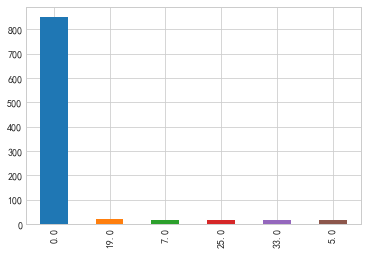

In [147]:
train['8_辐照度'].value_counts()[:5].plot(kind='bar')
plt.show()

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


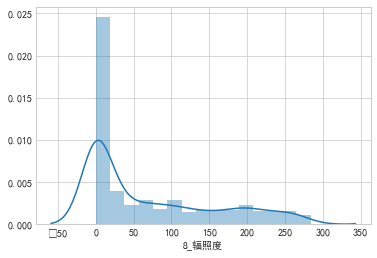

In [148]:
sns.distplot(train['8_辐照度'])
plt.show()

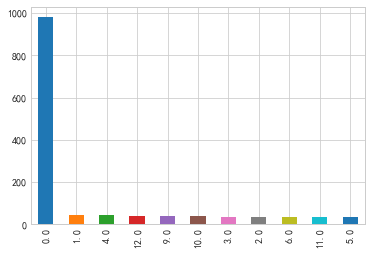

In [149]:
train['20_辐照度'].value_counts()[:5].plot(kind='bar')

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


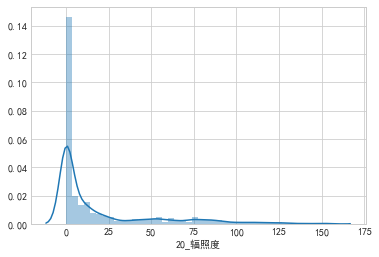

In [150]:
sns.distplot(train['20_辐照度'])
plt.show()

根据时刻8，20的辐照度是否为0新增两个类别特征

In [151]:
train['8_辐照度0']=train['8_辐照度'].map(lambda x:0 if x>0 else 1)
train['20_辐照度0']=train['20_辐照度'].map(lambda x:0 if x>0 else 1)

#### 2.1.3 其他时刻

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


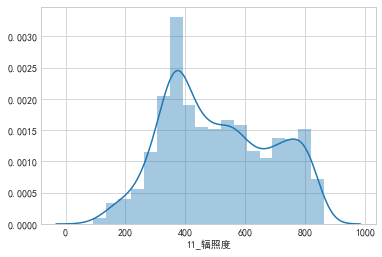

In [152]:
sns.distplot(train['11_辐照度'])

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


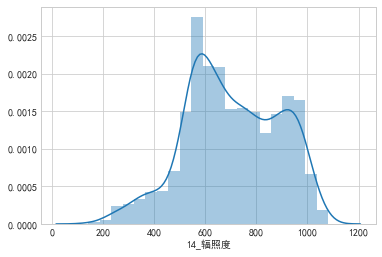

In [153]:
sns.distplot(train['14_辐照度'])

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


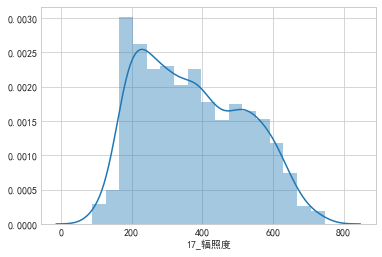

In [154]:
sns.distplot(train['17_辐照度'])

其他时刻不需要做特殊处理，基本上符合高斯分布

### 2.2 风速

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


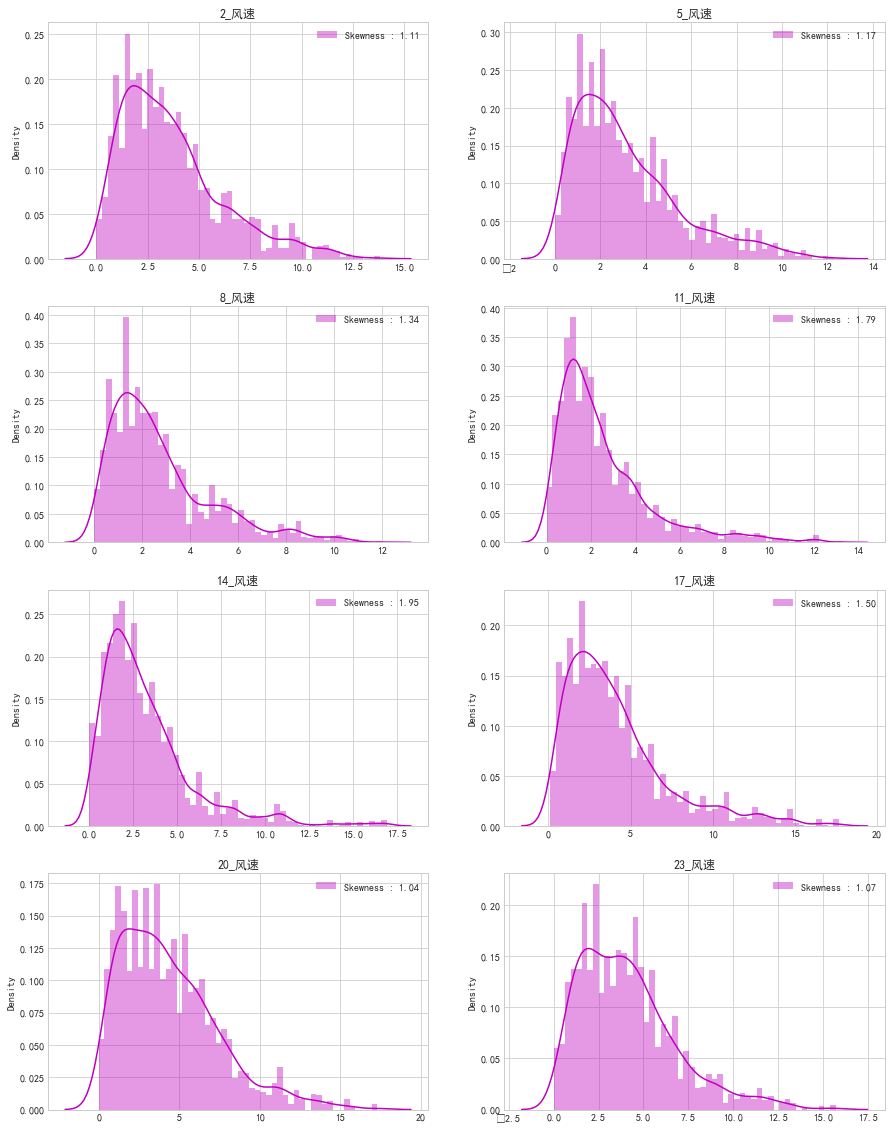

In [155]:
columns=['2_风速','5_风速','8_风速','11_风速','14_风速','17_风速','20_风速','23_风速']
grid = gridspec.GridSpec(4, 2)
plt.figure(figsize=(15,20))
for n, col in enumerate(train[columns]):
    ax = plt.subplot(grid[n])
    g=sns.distplot(train[col], bins = 50, color="m", label="Skewness : %.2f"%(train[col].skew())) #Will receive the "semi-salmon" violin
    g = g.legend(loc="best")
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')

每个时刻的风速分布差不多，差不多为一个高斯分布，我们暂不做处理

### 风向

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


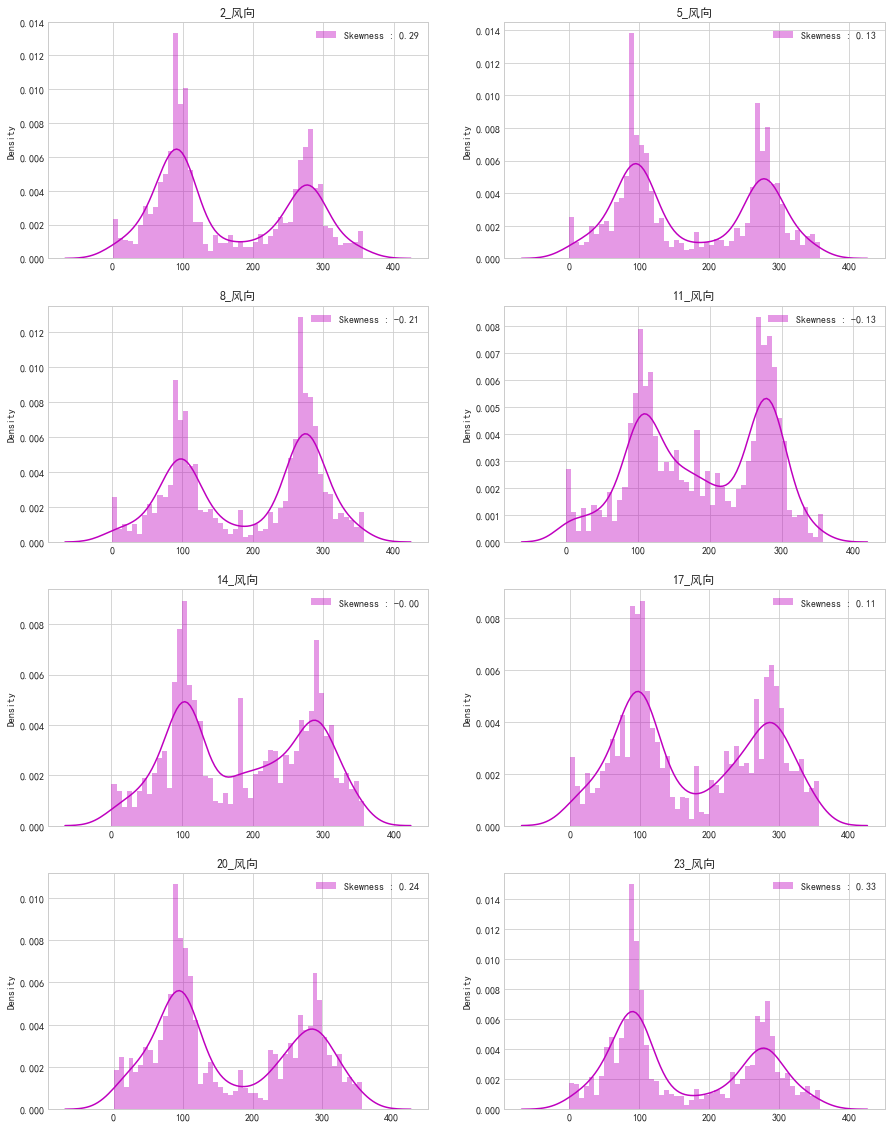

In [156]:
columns=['2_风向','5_风向','8_风向','11_风向','14_风向','17_风向','20_风向','23_风向']
grid = gridspec.GridSpec(4, 2)
plt.figure(figsize=(15,20))
for n, col in enumerate(train[columns]):
    ax = plt.subplot(grid[n])
    g=sns.distplot(train[col], bins = 50, color="m", label="Skewness : %.2f"%(train[col].skew())) #Will receive the "semi-salmon" violin
    g = g.legend(loc="best")
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')